# Enrich administrative boundaries by population information

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('New_York_City_Population_By_Neighborhood_Tabulation_Areas_20240618.csv')

In [3]:
len(df)

390

In [4]:
len(df)

390

In [5]:
df.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [6]:
import geopandas as gpd

In [7]:
gdf = gpd.read_file('2010 Neighborhood Tabulation Areas (NTAs).geojson')
print(len(gdf))

195


In [8]:
gdf.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ..."


In [9]:
print(set(df.Year))

{2000, 2010}


In [10]:
df = df[df.Year==2010]

In [11]:
len(df)

195

In [12]:
display(df.head(1))
display(gdf.head(1))

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078


,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."


In [13]:
codes_1 = set(df['NTA Code'])
codes_2 = set(gdf['ntacode'])

In [14]:
len(codes_1), len(codes_2), len(codes_1.intersection(codes_2))

(195, 195, 195)

In [15]:
gdf_merged = gdf.merge(df, right_on = 'NTA Code', left_on = 'ntacode')
gdf_merged = gdf_merged[['ntacode', 'geometry', 'Population']]
gdf_merged.head(3)

,ntacode,geometry,Population
0,QN08,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",48593
1,BK50,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",83693
2,BX41,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ...",51807


(np.float64(-74.28337047814922),
 np.float64(-73.67222994821337),
 np.float64(40.47516404814219),
 np.float64(40.93650271647436))

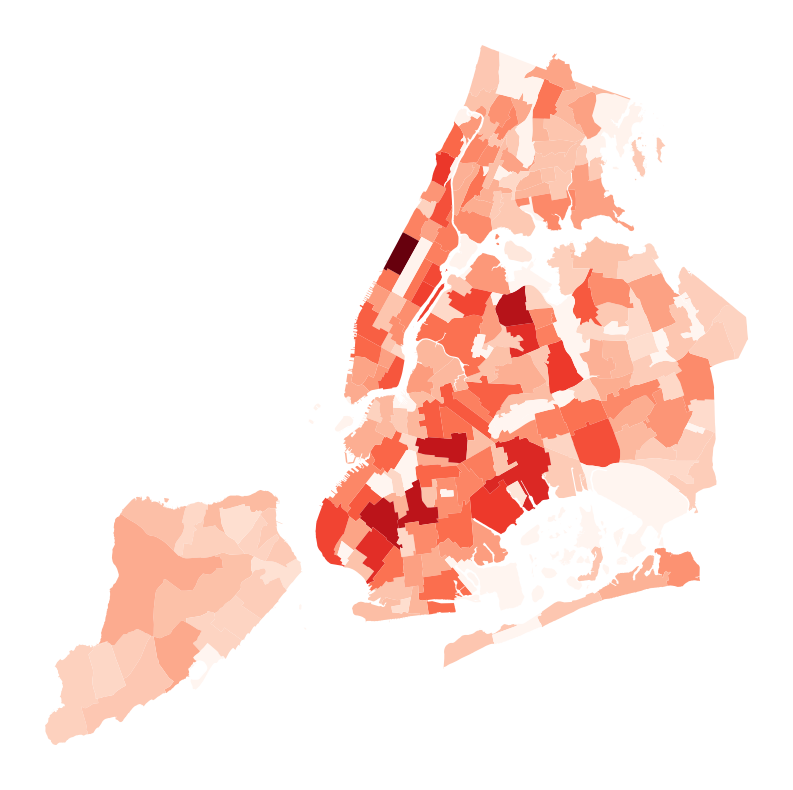

In [16]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(10,10))

gdf_merged.plot(ax=ax, column = 'Population', cmap = 'Reds')
ax.axis('off')